<a href="https://colab.research.google.com/github/ThePyProgrammer/GaitMonitoringForParkinsonsDiseasePatients/blob/main/Daphnet%20SVM%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Daphnet SVM Analysis


In [1]:
%load_ext autoreload
%autoreload 2
# to ensure kernel resets when files change around it
!pip install np ipympl
!wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
!ls  # Check if required cuda 9.0 amd64-deb file is downloaded
!dpkg -i cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
!ls /var/cuda-repo-9-0-local | grep .pub
!apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub
!apt-get update
!sudo apt-get install cuda-9.0
!nvcc --version
!pip install thundersvm

--2020-12-15 06:53:26--  https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 152.195.57.194
Connecting to developer.nvidia.com (developer.nvidia.com)|152.195.57.194|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/9.0/secure/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64.deb?-87PSZE4TxpB6rMS0YBk8BAxKkoAOq1k1XMyJKLxgWP4GfkC86BOpVRm5Ez0EYldkBWVcw30bay8X_-fGBE6kTkvE_Z0EdLKQVeCQL96RJfWBxwRmXEsqvL_nUDTWS4QXouTH-qObigB25CaGeU3oeE4yv9rcBt9NFxHq5dgfDdhwe2DiWXg4k8uts9tSRRhWt6Abba689xgGHKaljUs [following]
--2020-12-15 06:53:27--  https://developer.download.nvidia.com/compute/cuda/9.0/secure/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64.deb?-87PSZE4TxpB6rMS0YBk8BAxKkoAOq1k1XMyJKLxgWP4GfkC86BOpVRm5Ez0EYldkBWVcw30bay8X_-fGBE6kTkvE_Z0EdLKQVeCQL96RJfWBxwR

In [2]:
import np # numerical analysis
import pandas as pd # main library for data analysis
import matplotlib.pyplot as plt # main library for data plotting

from IPython.display import display, Markdown # to display the headers

from sklearn.model_selection import train_test_split # Import train_test_split function
# Import svm model
from thundersvm import SVC
# Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import *

import warnings
warnings.filterwarnings('ignore') # literally to ignore all the warnings that don't matter

"""pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)"""

%matplotlib inline

def printf(*args, sep=" ", end="\n"):
    string = sep.join([str(i) for i in args])+end
    display(Markdown(string))

In [13]:
df = pd.read_csv("data.csv")[["freezeX", "freezeY", "freezeZ", "freeze"]]
X = df[["freezeX", "freezeY", "freezeZ"]]
y = df.freeze
df

,freezeX,freezeY,freezeZ,freeze
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
1140830,0.0,0.0,0.0,0.0
1140831,0.0,0.0,0.0,0.0
1140832,0.0,0.0,0.0,0.0
1140833,0.0,0.0,0.0,0.0


In [14]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
X_train

,freezeX,freezeY,freezeZ
264000,0.000000,0.000000,0.000000
500643,3.251114,1.991447,3.606531
474234,0.000000,0.000000,0.000000
873081,0.910111,2.601755,0.576707
288112,6.636664,7.148119,1.328335
...,...,...,...
315611,0.000000,0.000000,0.000000
598933,0.347556,1.492882,0.217535
919601,0.000000,0.000000,0.000000
69206,0.726678,5.917535,0.443379


#  rbf


##  freezeXY


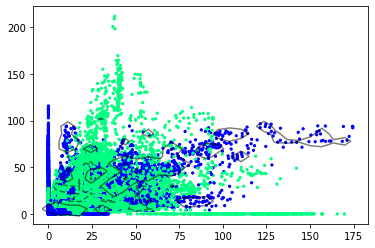

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95    309174
         1.0       0.65      0.17      0.28     33077

    accuracy                           0.91    342251
   macro avg       0.78      0.58      0.61    342251
weighted avg       0.89      0.91      0.89    342251



tp:  5768 , fp:  3100 fn:  27309 tn:  306074
Accuracy: 0.9111500039444735

Sensitivity: 0.1743809898116516
Specificity: 0.9899732836525711

Precision: 0.6504285069914298
Recall: 0.1743809898116516
F1: 0.2750268208368101






##  freezeXZ


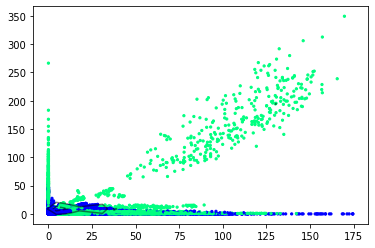

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95    309174
         1.0       0.66      0.18      0.29     33077

    accuracy                           0.91    342251
   macro avg       0.79      0.59      0.62    342251
weighted avg       0.89      0.91      0.89    342251



tp:  6040 , fp:  3051 fn:  27037 tn:  306123
Accuracy: 0.9120879120879121

Sensitivity: 0.18260422650179883
Specificity: 0.990131770459353

Precision: 0.6643933560664393
Recall: 0.18260422650179883
F1: 0.2864731549990514






##  freezeYZ


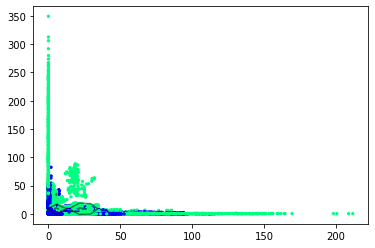

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95    309174
         1.0       0.66      0.16      0.26     33077

    accuracy                           0.91    342251
   macro avg       0.79      0.58      0.61    342251
weighted avg       0.89      0.91      0.89    342251



tp:  5403 , fp:  2724 fn:  27674 tn:  306450
Accuracy: 0.9111821440989215

Sensitivity: 0.16334613175318197
Specificity: 0.9911894273127754

Precision: 0.6648209671465486
Recall: 0.16334613175318197
F1: 0.2622560916415882






##  freeze


              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96    309174
         1.0       0.72      0.26      0.38     33077

    accuracy                           0.92    342251
   macro avg       0.82      0.62      0.67    342251
weighted avg       0.91      0.92      0.90    342251



tp:  8600 , fp:  3301 fn:  24477 tn:  305873
Accuracy: 0.9188373445220028

Sensitivity: 0.25999939535024336
Specificity: 0.9893231643023023

Precision: 0.7226283505587766
Recall: 0.25999939535024336
F1: 0.3824091778202677






#  linear


##  freezeXY


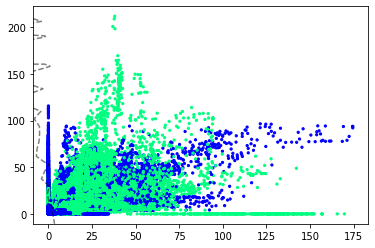

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95    309174
         1.0       0.00      0.00      0.00     33077

    accuracy                           0.90    342251
   macro avg       0.45      0.50      0.47    342251
weighted avg       0.82      0.90      0.86    342251



tp:  0 , fp:  0 fn:  33077 tn:  309174
Accuracy: 0.9033545555747098

Sensitivity: 0.0
Specificity: 1.0

Precision: nan
Recall: 0.0
F1: 0.0






##  freezeXZ


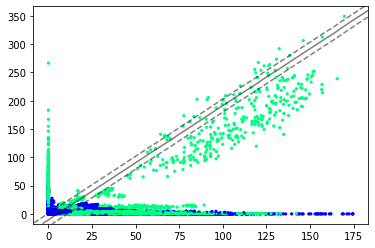

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95    309174
         1.0       0.51      0.24      0.33     33077

    accuracy                           0.90    342251
   macro avg       0.72      0.61      0.64    342251
weighted avg       0.88      0.90      0.89    342251



tp:  8028 , fp:  7737 fn:  25049 tn:  301437
Accuracy: 0.9042048087514719

Sensitivity: 0.24270641231066906
Specificity: 0.9749752566515942

Precision: 0.5092293054234063
Recall: 0.24270641231066906
F1: 0.32873346709798945






##  freezeYZ


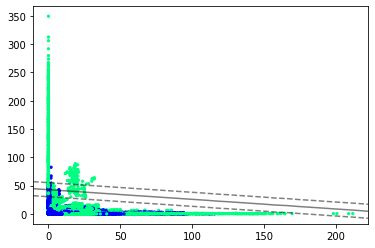

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95    309174
         1.0       0.89      0.01      0.01     33077

    accuracy                           0.90    342251
   macro avg       0.90      0.50      0.48    342251
weighted avg       0.90      0.90      0.86    342251



tp:  184 , fp:  23 fn:  32893 tn:  309151
Accuracy: 0.9038249705625404

Sensitivity: 0.005562777760981952
Specificity: 0.9999256082335514

Precision: 0.8888888888888888
Recall: 0.005562777760981952
F1: 0.01105636341785843






##  freeze


              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95    309174
         1.0       0.87      0.00      0.00     33077

    accuracy                           0.90    342251
   macro avg       0.89      0.50      0.48    342251
weighted avg       0.90      0.90      0.86    342251



tp:  78 , fp:  12 fn:  32999 tn:  309162
Accuracy: 0.9035473965013981

Sensitivity: 0.0023581340508510447
Specificity: 0.9999611869044616

Precision: 0.8666666666666667
Recall: 0.0023581340508510447
F1: 0.004703470316881238






#  sigmoid


##  freezeXY


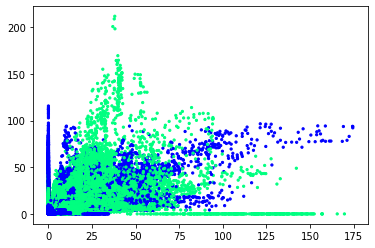

              precision    recall  f1-score   support

         0.0       0.89      0.70      0.78    309174
         1.0       0.07      0.22      0.11     33077

    accuracy                           0.65    342251
   macro avg       0.48      0.46      0.45    342251
weighted avg       0.81      0.65      0.72    342251



tp:  7375 , fp:  93189 fn:  25702 tn:  215985
Accuracy: 0.652620445228794

Sensitivity: 0.2229645977567494
Specificity: 0.698587203322401

Precision: 0.07333638280100235
Recall: 0.2229645977567494
F1: 0.11037032048547976






##  freezeXZ


In [ ]:
def plot2d(model, X, y, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=5, cmap='winter')

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    plt.show()


kernel_args = [
    {"kernel": "rbf"},
    {"kernel": "li", "degree": i} for i in range(2, 5)
]

datasets = {
    "freezeXY": ["freezeX", "freezeY"],
    "freezeXZ": ["freezeX", "freezeZ"],
    "freezeYZ": ["freezeY", "freezeZ"],
    "freeze": ["freezeX", "freezeY", "freezeZ"]
}

SVMs = []

for kwargs in kernel_args:
    printf("# ", kwargs["kernel"])
    for name, data in datasets.items():
        printf("## ", name)
        
        #Create a svm Classifier
        clf = SVC(**kwargs)
        
        # Train the model using the training sets
        clf.fit(X_train[data], y_train)
        
        # Predict the response for test dataset
        y_pred = clf.predict(X_test[data])
        SVMs.append(clf)

        # Plots
        if len(data) == 2:
          plot2d(clf, X[data].to_numpy(), y)

        
        # Model Accuracy: how often is the classifier correct?
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        p = tp/(tp+fp)
        r = sen = tp/(tp+fn)
        sp = tn/(tn+fp)
        f1 = 2*tp/(2*tp+fn+fp)
        a = (tp+tn)/(tp+tn+fp+fn)

        print(classification_report(y_test,y_pred))

        print("\n\ntp: ", tp, ", fp: ", fp, "fn: ", fn, "tn: ", tn)
        print("Accuracy:", a, end="\n\n")

        print("Sensitivity:", sen)
        print("Specificity:", sp, end="\n\n")

        print("Precision:", p)
        print("Recall:", r)
        print("F1:", f1)
        print("\n\n\n")